<h4>2. Consider the 128- dimensional feature vectors (d=128) given in the “gender_feature
_vectors.csv” file. (2 classes, male and female)</h4>
<p>a) Use <b><u>LDA</b> </u>to reduce the dimension from d to d’. (Here d=128)</p>
<p>b) Choose the direction W to reduce the dimension d’ (select appropriate d’).</p>
<p>c) Use d’ features to classify the test cases (any classification algorithm will do, Bayes
classifier, minimum distance classifier, and so on).</p>

Dataset Specifications:<br>

Total number of samples = 800 <br>
Number of classes = 2 (labeled as “male” and “female”)<br>
Samples from “1 to 400” belongs to class “male” <br>
Samples from “401 to 800” belongs to class “female” <br>
Number of samples per class = 400 Number of dimensions = 128 <br>
Use the following information to design classifier:<br>
Number of test cases ( first10 in each class)  = 20 <br>
Number of training featurevectors ( remaining 390 in each class) = 390 <br>
Number of reduced dimensions= d’ (map 128 to d’ features vector)</b>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
ds = pd.read_csv("data/gender_feature_vectors.csv")
ds.head()
ds.shape

(800, 130)

In [33]:
train = ds.iloc[:,1:]
train.head()

,Unnamed: 1,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135


In [34]:
# find sw and sb
class1 = train.loc[train['Unnamed: 1'] == "male"]
class2 = pd.DataFrame()
class2 = class2.append(train.loc[train['Unnamed: 1'] == "female"],ignore_index=True)
class2

,Unnamed: 1,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,female,0.039844,0.070357,0.130196,-0.007683,-0.077825,-0.021298,-0.024133,-0.085105,0.071288,...,0.105510,0.081928,-0.033337,-0.023604,-0.167003,-0.059075,0.053074,0.080940,0.011467,-0.021999
1,female,0.001747,0.185678,0.073260,0.042142,-0.088674,0.028186,-0.027830,-0.064211,0.097413,...,0.123615,0.030036,0.041442,-0.012818,-0.119177,-0.165786,-0.075368,-0.017690,0.067028,0.036452
2,female,-0.091598,0.095340,0.072125,-0.092276,-0.079953,0.047782,-0.004701,-0.092005,0.222913,...,0.011370,0.144719,0.089139,-0.059767,-0.111235,-0.055420,0.006283,0.016900,-0.081676,0.022809
3,female,-0.018751,0.088572,0.068894,-0.065700,-0.115126,0.024339,-0.028420,-0.159320,0.164595,...,0.010345,0.095309,0.012255,-0.033010,-0.097720,-0.218889,0.077764,0.045943,0.010856,0.100522
4,female,-0.130889,0.093262,0.122244,-0.110014,-0.157625,-0.036781,0.073908,-0.098571,0.120419,...,0.003229,0.049330,0.059733,-0.023820,-0.098432,-0.034316,0.075131,-0.029204,-0.020707,0.031028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
397,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
398,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
399,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [35]:
x1 = class1.iloc[:,1:].to_numpy()
x2 = class2.iloc[:,1:].to_numpy()
meanx1 = np.mean(x1,axis=0)
meanx2 = np.mean(x2,axis=0)

s1 = ((x1-meanx1).T).dot((x1-meanx1))
s2 = ((x2-meanx2).T).dot((x2-meanx2))
Sw = s1+s2
dm12 = (meanx1-meanx2)[np.newaxis].T
dm12t = (meanx1-meanx2)[np.newaxis]
Sb = np.dot(dm12,dm12t)
print(Sw.shape,Sb.shape)

(128, 128) (128, 128)


<h5>since we have found between class scatter Sb and within class scatter matrix Sw<br> we need
to find sw inverse and then solve for sw_inverse.sb for eigen values and eigen vectors

In [36]:
Swi = np.linalg.inv(Sw)
eigen_values,eigen_vectors = np.linalg.eig(Swi.dot(Sb))
eigen_vectors[0].shape

(128,)

In [37]:
pairs = [(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs,key = lambda x:x[0],reverse=True)
eigen_value_sum = 0
for e in pairs:
    eigen_value_sum += e[0]



In [38]:
for i,pair in enumerate(pairs):
    print("eigen value",i,(pair[0]/eigen_value_sum).real)

eigen value 0 0.9132504950119015
eigen value 1 0.08620040394920353
eigen value 2 1.1409831144081052e-05
eigen value 3 1.1409831144081052e-05
eigen value 4 1.1372578520314596e-05
eigen value 5 1.1372578520314596e-05
eigen value 6 1.1283470115183485e-05
eigen value 7 1.1283470115183485e-05
eigen value 8 1.123756132864832e-05
eigen value 9 1.123756132864832e-05
eigen value 10 1.0017022267071185e-05
eigen value 11 1.0017022267071185e-05
eigen value 12 9.58328975590581e-06
eigen value 13 9.58328975590581e-06
eigen value 14 9.207375989966495e-06
eigen value 15 9.207375989966495e-06
eigen value 16 8.847311498654953e-06
eigen value 17 8.201669316389005e-06
eigen value 18 8.201669316389005e-06
eigen value 19 8.124284054047418e-06
eigen value 20 8.124284054047418e-06
eigen value 21 8.07179527116486e-06
eigen value 22 7.769725491624805e-06
eigen value 23 7.769725491624805e-06
eigen value 24 7.5688570397000035e-06
eigen value 25 7.5688570397000035e-06
eigen value 26 7.023148833509911e-06
eigen val

 <h4>we can see that the first two eigen values are much greater than the rest
 <br>so lets take them as the two eigen vectors and do dimensionality reduction
 <br> hence the appropriate d' is 2

In [39]:
W = np.hstack((pairs[0][1].reshape(128,1),pairs[1][1].reshape(128,1))).real
W.shape

(128, 2)

<h4> W is 128x2
<br> X is nx128
<br> Y is X.W that is n x 2

In [40]:
print(x1.shape,x2.shape)

(399, 128) (401, 128)


In [41]:
X = np.concatenate((x1,x2))
X_reduced = np.dot(X,W)
X_reduced.shape

(800, 2)

<h4> lets divide test and train sets

In [42]:
X_test = X_reduced[np.r_[0:10,400:410],:]
Y_test = train.iloc[np.r_[0:10,400:410],[0]].to_numpy()

X_train = X_reduced[np.r_[10:400,410:],:]
Y_train = train.iloc[np.r_[10:400,410:],[0]].to_numpy()
print("shape of X_test and Y_test",X_test.shape,Y_test.shape)
print("shape of X_train and Y_train",X_train.shape,Y_train.shape)
Y_train = Y_train[:,0]
Y_test = Y_test[:,0]

shape of X_test and Y_test (20, 2) (20, 1)
shape of X_train and Y_train (800, 2) (800, 1)


<h5> using bayes classifier from sklearn

In [43]:
from sklearn.naive_bayes import GaussianNB
cfb = GaussianNB()
cfb.fit(X_train,Y_train)

GaussianNB()

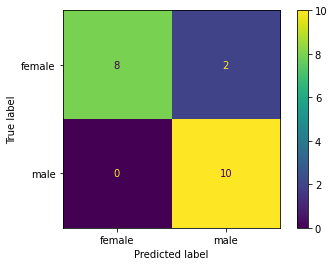

accuracy found is 90.0%


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib

cfb = GaussianNB()
cfb.fit(X_train,Y_train)
Y_predicted = cfb.predict(X_test)

plot_confusion_matrix(cfb,X_test,Y_test)
plt.show()
print("accuracy found is",str(accuracy_score(Y_predicted,Y_test)*100)+"%")


In [45]:
# todo plot
x1_reduced = np.dot(x1,W)
x2_reduced = np.dot(x2,W)
x1_x = x1_reduced[:,0]
x1_y = x1_reduced[:,1]
x2_x = x2_reduced[:,0]
x2_y = x2_reduced[:,1]

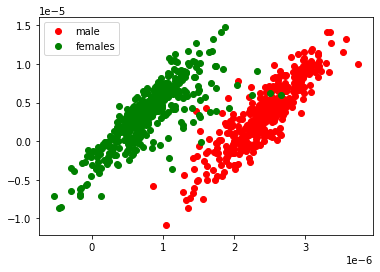

In [46]:
import matplotlib.pyplot as plt
plt.plot(x1_x,x1_y,label="male",color="red",linestyle="",marker='o')
plt.plot(x2_x,x2_y,label="females",color="green",linestyle="",marker='o')
plt.legend()
